In [6]:
import gym
import numpy as np
from collections import defaultdict


In [7]:
env = gym.make('Taxi-v3')


In [9]:
import numpy as np

class ApproximateQLearningAgent:
    def __init__(self, alpha, gamma, num_actions, num_states, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01):
        self.alpha = alpha
        self.gamma = gamma
        self.weights = np.zeros((num_states, num_actions))
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min

    def choose_action(self, state, action_mask):
        if np.random.rand() < self.epsilon:
            valid_actions = np.where(action_mask == 1)[0]
            return np.random.choice(valid_actions) if valid_actions.size > 0 else np.random.choice(range(len(action_mask)))
        else:
            q_values = self.get_q_values(state)
            masked_q_values = q_values * action_mask
            return np.argmax(masked_q_values)

    def get_q_values(self, state):
        return self.weights[state]

    def update(self, state, action, reward, next_state, done, action_mask):
        q_predict = self.get_q_values(state)[action]
        q_target = reward
        if not done:
            q_target += self.gamma * np.max(self.get_q_values(next_state) * action_mask)
        self.weights[state, action] += self.alpha * (q_target - q_predict)

    def update_epsilon(self):
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)


In [10]:
def train_agent(episodes, alpha, gamma, env):
    agent = ApproximateQLearningAgent(alpha, gamma, env.action_space.n, 500, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01)
    rewards_per_episode = []
    for episode in range(episodes):
        print(f"Episode: {episode}")
        state = env.reset()
        done = False
        total_episode_reward = 0

        while not done:
            action_mask = np.ones(env.action_space.n)  # Assuming all actions are valid initially
            action = agent.choose_action(state, action_mask)
            next_state, reward, done, info = env.step(action)

            if "action_mask" in info:
                action_mask = info["action_mask"]

            agent.update(state, action, reward, next_state, done, action_mask)
            state = next_state
            total_episode_reward += reward

        # Update epsilon at the end of each episode
        agent.update_epsilon()
        rewards_per_episode.append(total_episode_reward)

    return agent,rewards_per_episode

In [ ]:
agent ,rewards = train_agent(episodes=2000, alpha=0.1, gamma=0.999,env=env)

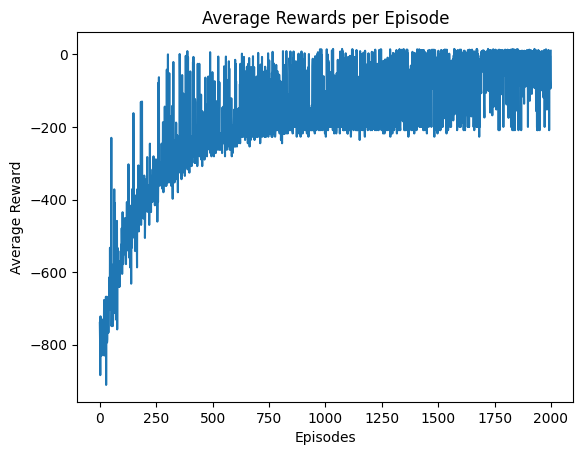

In [16]:
import matplotlib.pyplot as plt

def plot_rewards(rewards):
    plt.plot(rewards)
    plt.title('Average Rewards per Episode')
    plt.xlabel('Episodes')
    plt.ylabel('Average Reward')
    plt.show()

plot_rewards(rewards)

In [ ]:
def test_agent(agent, env, num_episodes):
    total_rewards = 0
    steps_per_episode = []

    for _ in range(num_episodes):
        state = env.reset()
        done = False
        steps = 0

        while not done:
            # Assuming your agent has a method for choosing an action based on state
            action_mask = np.ones(env.action_space.n)  # Assuming all actions are valid initially
            action = agent.choose_action(state, action_mask)
            state, reward, done, info = env.step(action)

            # Update the action mask from the info if available
            if "action_mask" in info:
                action_mask = info["action_mask"]

            total_rewards += reward
            steps += 1

        steps_per_episode.append(steps)

    avg_reward = total_rewards / num_episodes
    avg_steps = sum(steps_per_episode) / num_episodes
    return avg_reward, avg_steps


In [ ]:
avg_reward, avg_steps = test_agent(agent, env, 100)  # Test for 100 episodes
print(f"Average Reward: {avg_reward}, Average Steps per Episode: {avg_steps}")

Average Reward: 7.79, Average Steps per Episode: 12.94
